<a href="https://colab.research.google.com/github/Wajihashoaib/Machine-learning-/blob/main/Lab_Manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import pandas as pd #for data manupulation
import numpy as np  #for numbers and array
from sklearn import preprocessing #for preprocessing
label_encoder=preprocessing.LabelEncoder()  # for to label the data
from sklearn.model_selection import train_test_split #for to split data
from sklearn.preprocessing import normalize #for noramalize data

# QUESTION NO 1
 **Demonstration of pre-processing on dataset iris.csv in python**


In [ ]:
df = pd.read_csv('Iris.csv')

In [ ]:
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.drop("Id",axis=1,inplace=True)

In [ ]:
df["Species"]=label_encoder.fit_transform(df['Species'])

In [ ]:
Y=df["Species"]
X=df.loc[:,df.columns!="Species"]

In [ ]:
X=normalize(X,axis=0)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

# QUESTION NO 3

**Convert weather.arff in weather.csv in python**

In [ ]:
#Load the data using "arff.loadarff" then convert it to dataframe
from scipy.io import arff
data = arff.loadarff('/content/weather.numeric.arff')
df2 = pd.DataFrame(data[0])

In [ ]:
df2.to_csv('weather.csv')

In [ ]:
WD= pd.read_csv('weather.csv')

# QUESTION NO 2

Demonstration of pre-processing on dataset weather.csv in python 

In [ ]:
WD.head(2)

,Unnamed: 0,outlook,temperature,humidity,windy,play
0,0,b'sunny',85.0,85.0,b'FALSE',b'no'
1,1,b'sunny',80.0,90.0,b'TRUE',b'no'


In [ ]:
WD.drop(columns = 'Unnamed: 0' , inplace = True )

In [ ]:
WD.head()

,outlook,temperature,humidity,windy,play
0,b'sunny',85.0,85.0,b'FALSE',b'no'
1,b'sunny',80.0,90.0,b'TRUE',b'no'
2,b'overcast',83.0,86.0,b'FALSE',b'yes'
3,b'rainy',70.0,96.0,b'FALSE',b'yes'
4,b'rainy',68.0,80.0,b'FALSE',b'yes'


In [ ]:
WD['outlook'] = WD['outlook'].str[2:]
WD['windy'] = WD['windy'].str[2:]
WD['play'] = WD['play'].str[2:]

In [ ]:
WD.head(2)

,outlook,temperature,humidity,windy,play
0,sunny',85.0,85.0,FALSE',no'
1,sunny',80.0,90.0,TRUE',no'


In [ ]:
WD['windy'] = WD['windy'].str[:-1]
WD['outlook'] = WD['outlook'].str[:-1]
WD['play'] = WD['play'].str[:-1]

In [ ]:
WD.head(2)

,outlook,temperature,humidity,windy,play
0,sunny,85.0,85.0,FALSE,no
1,sunny,80.0,90.0,TRUE,no


In [ ]:
WD.isnull().sum()

outlook        0
temperature    0
humidity       0
windy          0
play           0
dtype: int64

In [ ]:
WD.head()

,outlook,temperature,humidity,windy,play
0,sunny,85.0,85.0,FALSE,no
1,sunny,80.0,90.0,TRUE,no
2,overcast,83.0,86.0,FALSE,yes
3,rainy,70.0,96.0,FALSE,yes
4,rainy,68.0,80.0,FALSE,yes


In [ ]:
WD["outlook"]=label_encoder.fit_transform(WD['outlook'])

In [ ]:
WD['windy'].replace({'FALSE': 0, 'TRUE': 1}, inplace=True)

In [ ]:
WD['play'].replace({'no': 0, 'yes': 1}, inplace=True)

In [ ]:
WD.head(2)

,outlook,temperature,humidity,windy,play
0,2,85.0,85.0,0,0
1,2,80.0,90.0,1,0


# QUESTION NO 4

**Demonstration of classification process on dataset student.csv using Naïve algorithm** 

In [ ]:
SD = pd.read_csv("student.csv")

In [ ]:
SD.head(2)
  

,age,income,student,credit_ratting,buy_computer
0,30,high,no,fair,no
1,30,high,no,excellent,no


In [ ]:
SD["income"]=label_encoder.fit_transform(SD['income'])

In [ ]:
SD['student'].replace({'no': 0, 'yes': 1}, inplace=True)

In [ ]:
SD['credit_ratting'].replace({'fair': 0, 'excellent': 1}, inplace=True)

In [ ]:
SD['buy_computer'].replace({'no': 0, 'yes': 1}, inplace=True)

In [ ]:
SD.head(2)

,age,income,student,credit_ratting,buy_computer
0,30,0,0,0,0
1,30,0,0,1,0


In [ ]:
X = SD.drop(['buy_computer'], axis=1)
y = SD['buy_computer']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy is: ", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy is:  100.0


# QUESTION NO 5

Demonstration of classification process on dataset credit using Decision tree.

In [ ]:
CD = pd.read_csv('/content/Credit_customer.csv')

In [ ]:
CD.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


In [ ]:
CD = CD.iloc[:, :-2]
CD.drop(['CLIENTNUM'], axis=1, inplace=True)
CD.head(4)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760


In [ ]:
cat_col_names = CD.columns[CD.dtypes==object].tolist()
cat_col_names

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
CD[cat_col_names] = CD[cat_col_names].apply(
    lambda col: label_encoder.fit_transform(col))

In [ ]:
x = CD.drop(['Attrition_Flag'], axis=1)
y = CD['Attrition_Flag']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
model_DecTreeClass = DecisionTreeClassifier(random_state=0)
model_DecTreeClass.fit(x_train, y_train)
y_pred_DecTreeClass = model_DecTreeClass.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_DecTreeClass)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC: %.2f' % (roc_auc*100), "%")

AUC: 88.13 %


# QUESTION NO 6

Demonstration of classification rule process on dataset cancer.csv using KNN algorithm

In [ ]:
CData = pd.read_csv('cancer.csv')

In [ ]:
CData.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [ ]:
CData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
CData.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
CData=CData.drop(["Unnamed: 32","id"],axis=1)

In [ ]:
CData["diagnosis"]=CData["diagnosis"].map({'B':0,'M':1}).astype(int)
CData.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x=CData[['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean','radius_se','perimeter_se', 'area_se','compactness_se', 'concave points_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','texture_worst','area_worst']]
y=CData[['diagnosis']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred =model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("KNN model accuracy is: ", metrics.accuracy_score(y_test, y_pred)*100)

KNN model accuracy is:  93.56725146198829


# QUESTION NO 7

In [ ]:
df = pd.read_csv('Iris.csv')

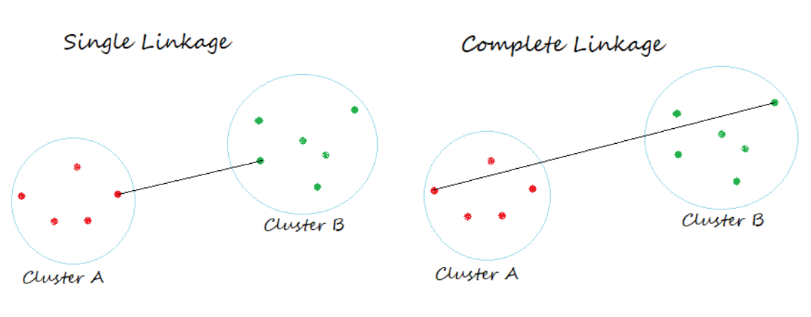

**Demonstration of clustering process on dataset iris.csv using complete link agglomerative algorithm.**

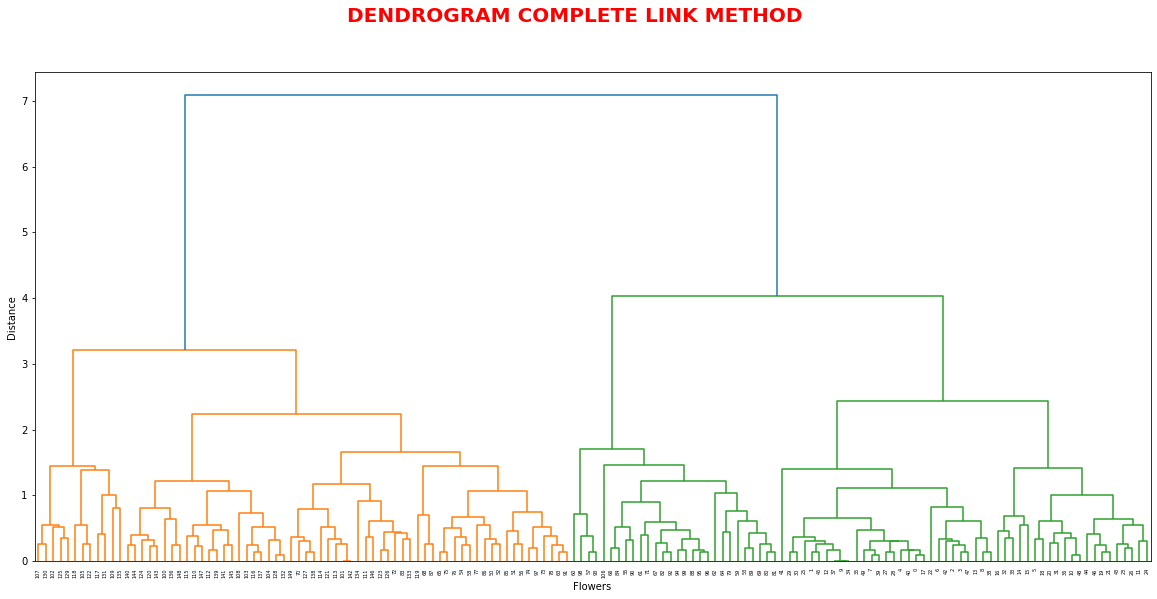

In [ ]:
DEN_GRAPH = linkage(df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],method="complete")
plt.figure(figsize=(20,9))
dendrogram(DEN_GRAPH, leaf_rotation=90)
plt.xlabel('Flowers')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM COMPLETE LINK METHOD",fontsize=20, fontweight = 'bold' , color = 'red') 
plt.show()

# QUESTION NO 8

**Demonstration of clustering process on dataset iris.csv using complete link agglomerative algorithm.**


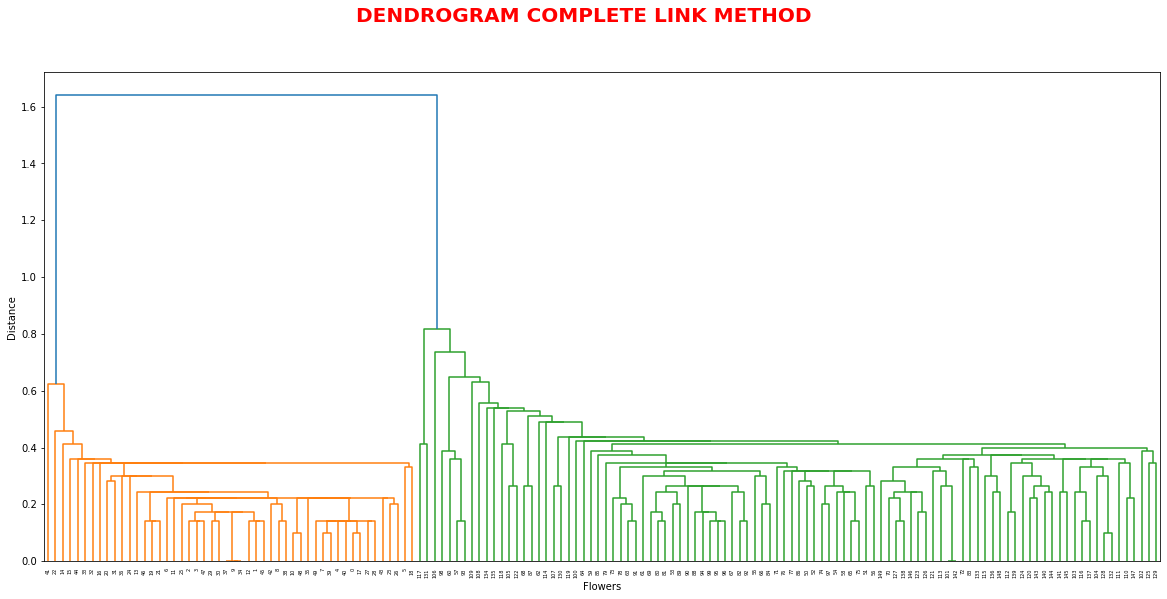

In [ ]:
DEN_GRAPH = linkage(df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],method="single")
plt.figure(figsize=(20,9))
dendrogram(DEN_GRAPH, leaf_rotation=90)
plt.xlabel('Flowers')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE LINK METHOD",fontsize=20, fontweight = 'bold' , color = 'red') 
plt.show()

# QUESTION NO 9

Demonstration of clustering rule process on dataset iris using simple 
k-means (k = 3)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df.drop('Id',inplace=True,axis=1) #Drop Id column

In [ ]:
df.head().style.background_gradient(sns.color_palette("YlOrBr", as_cmap=True))

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [ ]:
X = df.iloc[:,:-1] #Set our training data
y = df.iloc[:,-1] 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=.2, random_state=41)

In [ ]:
class KNN:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        
    def euclidean_distance(self, x1,x2):
        return np.sum(np.square(x1 - x2)**2)

    def fit(self, X_train, y_train):
        # Note in knn fit function just stores the values of X_train, y_train
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        #create empty array to store the predictions
        predictions = []
         # loop over X examples
        for x in X:
            #get prediction using the prediction helper funciton
            prediction = self._predict(x)
            # append the prediction to the predictions list
            predictions.append(prediction)
        return np.array(predictions)

    def _predict(self, x):
        # create empty array to store distances
        distances = []
        # loop over all training examples  and compute the distance between x and all the training examples 
        for x_train in self.X_train:
            distance = self.euclidean_distance(x, x_train)
            distances.append(distance)
        distances = np.array(distances)
        
        #Sort by ascendingly distance  and return indices of the given n neighbours
        n_neighbors_idxs = np.argsort(distances)[: self.n_neighbors]
        
        # Get labels of nneighbour indexes
        labels = y_train[n_neighbors_idxs]                  
        labels = list(labels)
        #get the highest present class in the array
        most_occuring_value = max(labels, key=labels.count)
        return most_occuring_value

In [ ]:
model = KNN(7)
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print(f" our model got accuracy score of : {accuracy}")    

 our model got accuracy score of : 0.9666666666666667
